In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [42]:
df = pd.read_csv('./DASC705001_HW1_News-1.csv', encoding='Ansi')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31460 entries, 0 to 31459
Columns: 262 entries, Id to Unnamed: 261
dtypes: float64(1), object(261)
memory usage: 62.9+ MB


In [44]:
df.head()

,Id,title,text,subject,date,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261
0,13970,WATCH: Paul Manafort Gets DESTROYED On CNN Fo...,"Paul Manafort, the chair of Donald Trump s cam...",News,14-Aug-16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41668,REFUGEE BUSINESS IS CASH COW FOR LUTHERAN CHAR...,How very charitable of the Lutheran and Cath...,left-news,08-May-15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26810,Trump?셲 Excuse For All His Sexist Statements ...,In case you ve been living under a rock for yo...,News,28-Mar-16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30967,'Jihadi Gran' gets 10 years after joining son ...,PARIS (Reuters) - A court on Friday sentenced ...,worldnews,06-Oct-17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26072,New Czech government to seek confidence vote o...,PRAGUE (Reuters) - The Czech government will s...,worldnews,13-Dec-17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. 데이터 전처리

In [45]:
# subject 컬럼을 기준으로 subject에 올바른 값이 있는 것과 아닌 것으로 데이터를 나눈다.

df_good = df[(df['subject'] == 'Government News') |
            (df['subject'] == 'left-news') |
            (df['subject'] == 'Middle-east') | 
            (df['subject'] == 'News') | 
            (df['subject'] == 'politics') | 
            (df['subject'] == 'politicsNews') | 
            (df['subject'] == 'US_News') | 
            (df['subject'] == 'worldnews')]

df_bad = df[(df['subject'] != 'Government News') &
            (df['subject'] != 'left-news') &
            (df['subject'] != 'Middle-east') & 
            (df['subject'] != 'News') & 
            (df['subject'] != 'politics') & 
            (df['subject'] != 'politicsNews') & 
            (df['subject'] != 'US_News') & 
            (df['subject'] != 'worldnews')]

In [46]:
df_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30105 entries, 0 to 31459
Columns: 262 entries, Id to Unnamed: 261
dtypes: float64(1), object(261)
memory usage: 60.4+ MB


In [47]:
df_bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355 entries, 35 to 31402
Columns: 262 entries, Id to Unnamed: 261
dtypes: float64(1), object(261)
memory usage: 2.7+ MB


In [48]:
# 결측치 확인
df_good.isnull().sum()

Id                  0
title               0
text                0
subject             0
date                0
                ...  
Unnamed: 257    30105
Unnamed: 258    30105
Unnamed: 259    30105
Unnamed: 260    30105
Unnamed: 261    30105
Length: 262, dtype: int64

## 1-1. df_good 전처리

<AxesSubplot:>

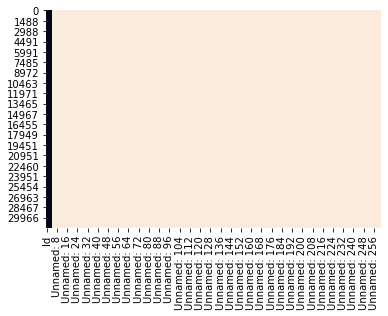

In [49]:
# 결측치 시각화
sns.heatmap(df_good.isnull(), cbar=False)

# df_good은 결측치 부분이 깔끔하게 딱 나누어져있다.

In [50]:
# df_good의 빈 컬럼들(결측치) 제거
df_good = df_good.dropna(axis=1)
df_good.head()

,Id,title,text,subject,date
0,13970,WATCH: Paul Manafort Gets DESTROYED On CNN Fo...,"Paul Manafort, the chair of Donald Trump s cam...",News,14-Aug-16
1,41668,REFUGEE BUSINESS IS CASH COW FOR LUTHERAN CHAR...,How very charitable of the Lutheran and Cath...,left-news,08-May-15
2,26810,Trump?셲 Excuse For All His Sexist Statements ...,In case you ve been living under a rock for yo...,News,28-Mar-16
3,30967,'Jihadi Gran' gets 10 years after joining son ...,PARIS (Reuters) - A court on Friday sentenced ...,worldnews,06-Oct-17
4,26072,New Czech government to seek confidence vote o...,PRAGUE (Reuters) - The Czech government will s...,worldnews,13-Dec-17


## 1-2. df_bad 전처리

### 1-2-1. df_bad에서 1차적으로 사용할 수 없는 행 제거

In [51]:
# 이번엔 df_bad 확인

df_bad.head(2)

,Id,title,text,subject,date,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261
35,10020,Candidate Handel?셲 Excellent Response to Alexa...,she wrote. Now more than ever,we must unite as a one nation under God. It i...,even when we disagree. Georgia Congression...,on Wednesday afternoon addressed that morning...,Va.,wounding five people including House Majority...,La.). Hodgkinson had penned a Facebook rant a...,unprovoked attack on the Republican congressi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,20973,?쏣NTITLED??DEM REP. SHEILA JACKSON LEE Has Bee...,a passenger on a United Airlines flight from ...,first-class seat,she threatened to remove her from the plane.S...,2017A mechanical problem with the plane delay...,she said,passengers were invited to consult with a gat...,Jackson Lee said she overheard Simon speaking...,the way the individual continued to act appea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

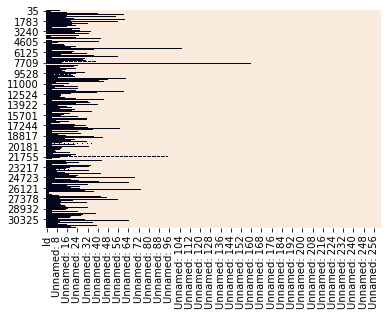

In [52]:
# df_bad의 결측치 확인(살구색이 결측값)
sns.heatmap(df_bad.isnull(), cbar=False)

# df_bad는 데이터가 참 더럽게 있다...

In [53]:
df_bad.tail(15)

# title까지는 값이 멀쩡한 줄 알았지만, text에 subject 값이 들어가있는 행들이 있는 것을 보니 title도 더이상 믿을 수 없게 됐다...
# (열이 한 칸씩 당겨져 title에도 text 내용이 섞였을 것이므로)

,Id,title,text,subject,date,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261
31146,44080,STATE DEPARTMENT COVERUP: Reporter Questions M...,Government News,11-May-16,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31202,7158,Justice Ginsburg hopes 'cooler heads' prevail ...,WASHINGTON (Reuters) - U.S. Supreme Court Just...,"2016 """,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31242,42107,Trump Rages: My Tweets Attacking Mika Are ?쁌o...,which by many have been deemed to be unpresid...,says amateur president Donald Trump. The curr...,now you know! Trump is not just a big whiny baby,I won . Donald J. Trump (@realDonaldTrump) J...,2017 .the 2016 election with interviews,speeches and social media. I had to beat #Fak...,and did. We will continue to WIN! Donald J. ...,2017He wrote this in Republican caps so it mu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31249,23509,What?! John McCain says Rand Paul is ?쏻orking ...,John McCain accused Rand Paul of working for...,because he objected to the expansion of NATO ...,Stuart J. Hooper examines the other nefarious...,16-Mar-17,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31266,24548,WATCH: New Clinton Ad Brilliantly Goes After ...,you d think he made all of the products withi...,many product lines here in the good old U.S. ...,facts and reality tell a different story from...,of course,killing jobs in the United States,but boosting jobs overseas. So,he s not lying when he says he ll put people ...,because he s been doing it in China,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31276,44417,"DAY AFTER DALLAS COPS??MEMORIAL, Obama Invites...",they had no idea what that would mean for our...,but you can t take the agitator out of him Ob...,DeRay McKesson. McKesson was arrested on July...,2016We are at the @WhiteHouse right now for a...,2016In addition to Deray,who advocated looting for political purposes,Obama also is meeting with Mica Grimm,who is a leader from the Minnesota group who ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31285,13545,ROMNEY CRITICIZES TEA PARTY CANDIDATE TED CRUZ...,July 31,2015 Rush Limbaugh show. Rush is truly one of...,and I made the observation that I can t recal...,if there was an example of it. I couldn t thi...,here s another thing: I ve been doing In the...,I ve been doing just a voluminous amount of r...,both parties,and the Republican Party,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31291,21959,ALL HELL IS ABOUT TO BREAK LOOSE Between Europ...,police forces find themselves ill-equipped to...,so citizens are now finding themselves in a p...,2015,wearing bomber jackets with their logo on the...,girlfriends and children after a migrant inf...,the Norwegian newspaper VG has received a sta...,and photographs of the planned uniform.The gr...,who are patrolling the streets,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31320,33827,HYSTERICAL! HERE?셎 WHY TRUMP SAID TO REPORTER:...,politics,23-Mar-17,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31330,21518,#PhoenixRally ROCKS! WATCH: President Trump Ca...,AZ. It wouldn t be Donald J. Trump if he didn...,Media doesn t want to report that I spoke ou...,VA,Trump blamed both sides. The media quickly co...,simply because he wasn t willing to let the v...,anti-American group Antifa or the violent dom...,Black Lives Matter off the hook for their par...,2017Trump went after the media for pushing a ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_bad.isnull().sum()

# 심지어 title이랑 text에 결측값도 있다^^

Id                16
title             16
text              16
subject           32
date              50
                ... 
Unnamed: 257    1354
Unnamed: 258    1354
Unnamed: 259    1354
Unnamed: 260    1354
Unnamed: 261    1354
Length: 262, dtype: int64

In [55]:
# 일단 데이터가 최소 5개는 있어야 하므로, 데이터가 5개 미만인 행은 삭제한다.
df_bad = df_bad.dropna(thresh=5)
df_bad.isnull().sum()

# 50개 행이 삭제됐으므로 현재까지 데이터 손실율은 약 0.16%

Id                 0
title              0
text               0
subject            0
date               0
                ... 
Unnamed: 257    1304
Unnamed: 258    1304
Unnamed: 259    1304
Unnamed: 260    1304
Unnamed: 261    1304
Length: 262, dtype: int64

In [56]:
# 거기다가 Unnamed: 5 컬럼이 NaN인 것은 열들이 한 칸씩 앞으로 당겨져 결국 text에 title이 섞인 것이므로,
# 일일이 title을 읽으면서 분리해줄 수는 없으니 이것들도 삭제하도록 한다.
df_bad = df_bad.dropna(subset=['Unnamed: 5'])
df_bad.isnull().sum()

# 추가로 73개 행이 삭제되어 총 123개 행을 삭제함. 현재까지 데이터 손실율은 약 0.39%

Id                 0
title              0
text               0
subject            0
date               0
                ... 
Unnamed: 257    1231
Unnamed: 258    1231
Unnamed: 259    1231
Unnamed: 260    1231
Unnamed: 261    1231
Length: 262, dtype: int64

### 1-2-2. df_bad 결측치 처리

In [57]:
# 먼저 NaN을 None으로 바꿔준다. 그 이유는 NaN은 비교연산이 안 되기 때문!
#df_bad = df_bad.where(pd.notnull(df_bad), None)

In [58]:
#for i in tqdm_notebook(range(0, 1232)):
#    for j in range(3, 261) :
#        if df_bad.iloc[i,j] == float :
#            print(i,j)

### 1-2-3. df_bad의 text들을 하나로 합치기

In [59]:
# 일단 문자열 연산을 위해 전체를 str로 바꿔준다.

df_bad = df_bad.astype(str)

In [60]:
df_bad.head()

,Id,title,text,subject,date,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261
35,10020,Candidate Handel?셲 Excellent Response to Alexa...,she wrote. Now more than ever,we must unite as a one nation under God. It i...,even when we disagree. Georgia Congression...,on Wednesday afternoon addressed that morning...,Va.,wounding five people including House Majority...,La.). Hodgkinson had penned a Facebook rant a...,unprovoked attack on the Republican congressi...,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
56,20973,?쏣NTITLED??DEM REP. SHEILA JACKSON LEE Has Bee...,a passenger on a United Airlines flight from ...,first-class seat,she threatened to remove her from the plane.S...,2017A mechanical problem with the plane delay...,she said,passengers were invited to consult with a gat...,Jackson Lee said she overheard Simon speaking...,the way the individual continued to act appea...,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
70,30576,WATCH RELATIVES SPEAK OUT After Teen Caught In...,get in line in front of people who are white ...,this is the result. Bernie Sanders or Hillar...,entitelment behavior. The family of a teenage...,said Johnson s cousin Nautika Harris to loca...,she said. You have to understand how he go...,very big on education,"loved learning. Via:Controversial Times""",left-news,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
94,25270,FACEBOOK USER ARRESTED FOR ?쏰ffensive??Posts A...,Obama s Attorney General,Loretta Lynch warned Americans the U.S.Depart...,Police Scotland confirmed on Tuesday that a 4...,had been arrested under the Communications Ac...,as Scotland welcomed one third of the thousan...,Insp Ewan Wilson from Dunoon police office sa...,left-news,16-Feb-16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
108,18737,LORETTA LYNCH Gives Radical Black Lives Matter...,Attorney General Loretta Lynch said Friday.H...,she zig-zagged between her calls for more pol...,her suggestions that cops should be blamed fo...,Americans across the country are feeling a se...,of uncertainty,of fear. Now,these feelings are understandable and they ar...,Lynch said. Rather,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [61]:
# 날짜들을 처리하는 함수를 정규식을 이용해 만든다.

import re

def find_date(i,j) :
    if re.match('(\d{2}-[a-zA-z]+-\d{2})', df_bad.iloc[i,j]) :  
        return 'date'
    else :
        return 'not_date'

In [62]:
# !pip instal tqdm
from tqdm import tqdm_notebook # 반복문 진척도 시각화 패키지


# 셀이 subject 종류 혹은 날짜가 아니라면 합치고,
# 그 셀은 'nan'으로 만든다.

for i in tqdm_notebook(range(0, 1232)):
    for j in range(3, 262) :
        if (
            (df_bad.iloc[i,j] != 'Government News') &
            (df_bad.iloc[i,j] != 'left-news') & 
            (df_bad.iloc[i,j] != 'Middle-east') & 
            (df_bad.iloc[i,j] != 'News') & 
            (df_bad.iloc[i,j] != 'politics') & 
            (df_bad.iloc[i,j] != 'politicsNews') & 
            (df_bad.iloc[i,j] != 'US_News') & 
            (df_bad.iloc[i,j] != 'worldnews') &
            (find_date(i,j) != 'date')
        ):
            df_bad.iloc[i,2] = df_bad.iloc[i,2] + " " + df_bad.iloc[i,j]
            df_bad.iloc[i,j] = 'nan'
        else :
            break


In [63]:
df_bad.head()

,Id,title,text,subject,date,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261
35,10020,Candidate Handel?셲 Excellent Response to Alexa...,she wrote. Now more than ever we must unit...,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
56,20973,?쏣NTITLED??DEM REP. SHEILA JACKSON LEE Has Bee...,a passenger on a United Airlines flight from ...,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
70,30576,WATCH RELATIVES SPEAK OUT After Teen Caught In...,get in line in front of people who are white ...,nan,nan,nan,nan,nan,nan,left-news,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
94,25270,FACEBOOK USER ARRESTED FOR ?쏰ffensive??Posts A...,Obama s Attorney General Loretta Lynch warne...,nan,nan,nan,nan,nan,left-news,16-Feb-16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
108,18737,LORETTA LYNCH Gives Radical Black Lives Matter...,Attorney General Loretta Lynch said Friday.H...,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [64]:
# 'nan'을 None로 바꾸기
#for i in tqdm_notebook(range(0, 1232)):
#    for j in range(3, 262) :
#        if df_bad.iloc[i,j] == 'nan':
#            df_bad.iloc[i,j] = None

In [65]:
df_bad.isnull().head(10)

,Id,title,text,subject,date,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261
35,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
56,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
351,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
563,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
# 흩어진 subject와 date를 제자리로 옮기기

for i in tqdm_notebook(range(0, 1232)):
    for j in range(3, 262) :
        if (
            (df_bad.iloc[i,j] == 'Government News') |
            (df_bad.iloc[i,j] == 'left-news') | 
            (df_bad.iloc[i,j] == 'Middle-east') | 
            (df_bad.iloc[i,j] == 'News') | 
            (df_bad.iloc[i,j] == 'politics') | 
            (df_bad.iloc[i,j] == 'politicsNews') | 
            (df_bad.iloc[i,j] == 'US_News') | 
            (df_bad.iloc[i,j] == 'worldnews')
        ):
            df_bad.iloc[i,3] = df_bad.iloc[i,j]
            
        elif find_date(i,j) == 'date' :
            df_bad.iloc[i,4] = df_bad.iloc[i,j]

In [67]:
df_bad.head(3)

,Id,title,text,subject,date,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261
35,10020,Candidate Handel?셲 Excellent Response to Alexa...,she wrote. Now more than ever we must unit...,politics,14-Jun-17,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
56,20973,?쏣NTITLED??DEM REP. SHEILA JACKSON LEE Has Bee...,a passenger on a United Airlines flight from ...,politics,26-Dec-17,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
70,30576,WATCH RELATIVES SPEAK OUT After Teen Caught In...,get in line in front of people who are white ...,left-news,16-Mar-16,nan,nan,nan,nan,left-news,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [68]:
# 불필요한 컬럼들 제거
df_bad = df_bad.drop(df_bad.columns[5:262], axis=1)
df_bad.head()

,Id,title,text,subject,date
35,10020,Candidate Handel?셲 Excellent Response to Alexa...,she wrote. Now more than ever we must unit...,politics,14-Jun-17
56,20973,?쏣NTITLED??DEM REP. SHEILA JACKSON LEE Has Bee...,a passenger on a United Airlines flight from ...,politics,26-Dec-17
70,30576,WATCH RELATIVES SPEAK OUT After Teen Caught In...,get in line in front of people who are white ...,left-news,16-Mar-16
94,25270,FACEBOOK USER ARRESTED FOR ?쏰ffensive??Posts A...,Obama s Attorney General Loretta Lynch warne...,left-news,16-Feb-16
108,18737,LORETTA LYNCH Gives Radical Black Lives Matter...,Attorney General Loretta Lynch said Friday.H...,left-news,08-Jul-16


In [69]:
df_bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 35 to 31402
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1232 non-null   object
 1   title    1232 non-null   object
 2   text     1232 non-null   object
 3   subject  1232 non-null   object
 4   date     1232 non-null   object
dtypes: object(5)
memory usage: 57.8+ KB


In [70]:
# good 과 bad를 합치자
df_concat = pd.concat([df_good,df_bad], ignore_index=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31337 entries, 0 to 31336
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       31337 non-null  object
 1   title    31337 non-null  object
 2   text     31337 non-null  object
 3   subject  31337 non-null  object
 4   date     31337 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [71]:
# ID, date도 필요 없으니 지운다.
df_concat = df_concat.drop(['Id', 'date'], axis=1)

# 2. Bag of Words
- 과제 1-1 : "title"과 "text"에서 가장 많이 등장하는 단어는 무엇인가? 본인이 제시할 수 있는 가장 유의미한 상위 10개의 단어를 각각 제시하라.
- 과제 1-2 : "subject"가 "worldnews"인 경우와 "US_NEWS"의 경우 1-1의 답변은 어떻게 달라지는가?

## 2-1. 하나의 문단으로 만들기

In [72]:
# 과제 1-1을 수행하는 용도로 df_1을 정의한다.
df_1 = df_concat[['title', 'text']]

In [73]:
df_1.head()

,title,text
0,WATCH: Paul Manafort Gets DESTROYED On CNN Fo...,"Paul Manafort, the chair of Donald Trump s cam..."
1,REFUGEE BUSINESS IS CASH COW FOR LUTHERAN CHAR...,How very charitable of the Lutheran and Cath...
2,Trump?셲 Excuse For All His Sexist Statements ...,In case you ve been living under a rock for yo...
3,'Jihadi Gran' gets 10 years after joining son ...,PARIS (Reuters) - A court on Friday sentenced ...
4,New Czech government to seek confidence vote o...,PRAGUE (Reuters) - The Czech government will s...


In [74]:
# 전체 데이터 하나의 행으로 합치기
for c in range(0, 2):   # 행으로 합치는거니 위에 썼던 for문과는 반대로!
    for r in tqdm_notebook(range(1, 31337)) :
        df_1.iloc[0,c] = df_1.iloc[0,c] + " " + df_1.iloc[r,c]

In [76]:
df_1 = df_1.drop(labels=range(1, 31337), axis=0) # 인덱스 0번 빼고는 다 지움 
df_1.head()

,title,text
0,WATCH: Paul Manafort Gets DESTROYED On CNN Fo...,"Paul Manafort, the chair of Donald Trump s cam..."


In [208]:
#!pip3 show nltk

Name: nltk
Version: 3.5
Summary: Natural Language Toolkit
Home-page: http://nltk.org/
Author: Steven Bird
Author-email: stevenbird1@gmail.com
License: Apache License, Version 2.0
Location: c:\programdata\anaconda3\lib\site-packages
Requires: tqdm, joblib, click, regex
Required-by: 


In [78]:
import nltk
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words('english')

In [110]:
# 영어 대소문자 이외의 문자, 특수문자들을 공백으로 변경
df_1_title = re.sub('[^a-zA-Z]', ' ', df_1.iloc[0,0])
df_1_text = re.sub('[^a-zA-Z]', ' ', df_1.iloc[0,1])
print(df_1_title[:100]) # 100글자만 확인
print(df_1_text[:100])

 WATCH  Paul Manafort Gets DESTROYED On CNN For Defending Trump   Lies  VIDEO  REFUGEE BUSINESS IS C
Paul Manafort  the chair of Donald Trump s campaign  got slammed by Jake Tapper during a segment on 


In [111]:
# 전부 소문자로 변경
df_1_title = df_1_title.lower()
df_1_text = df_1_text.lower()

## 2-2. Stopwords

In [96]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hjb38\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [112]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df_1_title = tokenizer.tokenize(df_1_title)
df_1_text = tokenizer.tokenize(df_1_text)

# split으로 문자를 단어별로 토큰화 할 수도 있다.
'''
df_1_title = df_1_title.split()
df_1_text = df_1_text.split()
'''

In [114]:
df_1_title = [x for x in df_1_title if x not in stop_words]
df_1_text = [x for x in df_1_text if x not in stop_words]

## 2-3. Stemming and Lemmatization
- stemming(어간추출, 형태소 분석) : 어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해 내는 것.
    "message", "messages", "messaging" 과 같이 복수형, 진행형 등의 문자를 같은 의미의 단어로 다룰 수 있도록 도와준다.
    여기에서는 NLTK에서 제공하는 형태소 분석기를 사용한다. 포터 형태소 분석기는 보수적이고 랭커스터 형태소 분석기는 좀 더 적극적이다. 형태소 분석 규칙의 적극성 때문에 랭커스터 형태소 분석기는 더 많은 동음이의어 형태소를 생산한다.


- Lemmatization(음소표기법) : 언어학에서 음소 표기법 (또는 lemmatization)은 단어의 보조 정리 또는 사전 형식에 의해 식별되는 단일 항목으로 분석 될 수 있도록 굴절 된 형태의 단어를 그룹화하는 과정이다.

        1) *배*가 맛있다. 
        2) *배*를 타는 것이 재미있다. 
        3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다.
    
    위에 있는 3개의 문장에 있는 "배"는 모두 다른 의미를 갖는다. 레마타이제이션은 이때 앞뒤 문맥을 보고 단어의 의미를 식별하는 것이다. 영어에서 meet는 meeting으로 쓰였을 때 회의를 뜻하지만 meet 일 때는 만나다는 뜻을 갖는데 그 단어가 명사로 쓰였는지 동사로 쓰였는지에 따라 적합한 의미를 갖도록 추출하는 것이다.

In [115]:
# Stemming
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
df_1_title = [stemmer.stem(w) for w in df_1_title]
df_1_text = [stemmer.stem(w) for w in df_1_text]

In [116]:
df_1_title[0:10]
# gets 가 get으로, destroyed가 destroy로 변경되었다.

['watch',
 'paul',
 'manafort',
 'get',
 'destroy',
 'cnn',
 'defend',
 'trump',
 'lie',
 'video']

In [117]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df_1_title = [lemmatizer.lemmatize(w) for w in df_1_title]
df_1_text = [lemmatizer.lemmatize(w) for w in df_1_text]

In [118]:
# 토큰별(단어별) 카운팅!
from collections import Counter

df_1_title_bow = Counter(df_1_title)
df_1_text_bow = Counter(df_1_text)

## 과제 1-1
: "title"과 "text"에서 가장 많이 등장하는 단어는 무엇인가? 본인이 제시할 수 있는 가장 유의미한 상위 10개의 단어를 각각 제시하라.

In [119]:
df_1_title_bow.most_common(10)

[('trump', 10733),
 ('video', 6059),
 ('u', 4154),
 ('say', 3011),
 ('obama', 2398),
 ('hillari', 1725),
 ('hous', 1517),
 ('presid', 1506),
 ('watch', 1429),
 ('clinton', 1352)]

In [120]:
df_1_text_bow.most_common(10)

[('trump', 93807),
 ('said', 92519),
 ('u', 49591),
 ('state', 43670),
 ('presid', 41636),
 ('would', 38082),
 ('year', 28922),
 ('peopl', 28902),
 ('republican', 27740),
 ('one', 26864)]

u는 아무래도 you를 뜻하는 것 같다. u 및 불필요한 단어들을 제외하기 위해 상위 15위까지 찾아보자

In [122]:
df_1_title_bow.most_common(15)

[('trump', 10733),
 ('video', 6059),
 ('u', 4154),
 ('say', 3011),
 ('obama', 2398),
 ('hillari', 1725),
 ('hous', 1517),
 ('presid', 1506),
 ('watch', 1429),
 ('clinton', 1352),
 ('republican', 1342),
 ('new', 1296),
 ('white', 1210),
 ('senat', 1203),
 ('democrat', 1107)]

In [121]:
df_1_text_bow.most_common(15)

[('trump', 93807),
 ('said', 92519),
 ('u', 49591),
 ('state', 43670),
 ('presid', 41636),
 ('would', 38082),
 ('year', 28922),
 ('peopl', 28902),
 ('republican', 27740),
 ('one', 26864),
 ('say', 25458),
 ('elect', 22120),
 ('also', 21646),
 ('new', 21498),
 ('govern', 21315)]

## title에서 가장 많이 등장하는 '유의미한' 단어 상위 10개.
(제외 : 2위 u, 4위 say, 9위 watch)
1. trump
2. video
3. obama
4. hillari
5. hous
6. presid = President
7. clinton
8. republican
9. new
10. white



## text에서 가장 많이 등장하는 '유의미한' 단어 상위 10개.
(제외 : 2위 said, 3위 u, 11위 say 13위 also)
1. trump
2. state
3. presid = President
4. would
5. year
6. peopl = people
7. republican
8. one
9. elect
10. new

## 과제 1-2
: "subject"가 "worldnews"인 경우와 "US_NEWS"의 경우 1-1의 답변은 어떻게 달라지는가?

In [ ]:
# 과제 1-1을 하기 전, 과제 1-2를 위해 subject와 worldnews끼리 묶어서 합친다.
for c in range(0, 2):   # 행으로 합치는거니 위에 썼던 for문과는 반대로!
    for r in tqdm_notebook(range(1, 31337)) :
        if df_1.iloc[r,2] == ''
        df_1.iloc[0,0] = df_1.iloc[0,0] + " " + df_1.iloc[r,c]

In [ ]:
df_1.sort_values(by=['subject'], axis=0)

# 3. TF-IDF
- 과제 1.3 : 위 과제 1-1과 1-2에서 찾은 60개(중복포함) 단어의 TF-IDF는 얼마인가?

- 과제 2 : 본인이 과제1을 수행하기 위해 이용한 Library를 명시하고 해당 Library에서 사용하고 있는 TF-IDF는 어떤 공식을 따르는지 제시하라.